Step 1:
  s: 0.1549
  c: 0.35
  r: 0.4951
Step 2:
  s: 0.2931
  c: 0.4328
  r: 0.2741
Step 3:
  s: 0.3726
  c: 0.4398
  r: 0.1876
Step 4:
  s: 0.4218
  c: 0.4263
  r: 0.1519
Step 5:
  s: 0.4513
  c: 0.411
  r: 0.1377
Step 6:
  s: 0.4707
  c: 0.3993
  r: 0.13
Step 7:
  s: 0.4733
  c: 0.4012
  r: 0.1255
Step 8:
  s: 0.4657
  c: 0.4026
  r: 0.1317
Step 9:
  s: 0.4675
  c: 0.3993
  r: 0.1332
Step 10:
  s: 0.458
  c: 0.405
  r: 0.137
[[ 0.74199852+0.j          0.65465367+0.j          0.65465367-0.j        ]
 [ 0.63599873+0.j         -0.54554473+0.36187343j -0.54554473-0.36187343j]
 [ 0.21199958+0.j         -0.10910895-0.36187343j -0.10910895+0.36187343j]]
[0.46666667+0.j 0.4       +0.j 0.13333333+0.j]


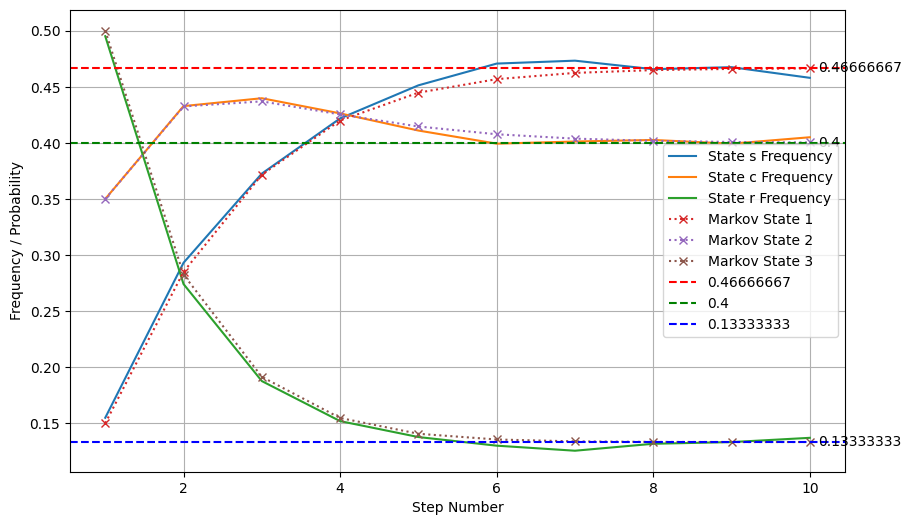

In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# 초기 상태 및 시뮬레이션 설정
initial_state = 'r'  # 초기 상태 'r'
total_steps = 10  # 총 스텝 수
total_runs = 10000  # 총 실행 횟수

# 각 스텝에서의 상태 빈도를 저장할 딕셔너리 초기화
step_counts = [{'s': 0, 'c': 0, 'r': 0} for _ in range(total_steps)]

# 주어진 스텝을 실행하는 함수
def run_steps(initial_state, total_steps):
    state = initial_state  # 초기 상태 설정
    for i in range(total_steps):  # 각 스텝마다 상태 전이 수행
        random_number = rd.uniform(0, 1)  # 난수 생성
        if state == 's':  # 현재 상태가 's'인 경우
            state = np.random.choice(['s', 'c', 'r'], p=[0.7, 0.2, 0.1])
        elif state == 'c':  # 현재 상태가 'c'인 경우
            state = np.random.choice(['s', 'c', 'r'], p=[0.3, 0.65, 0.05])
        elif state == 'r':  # 현재 상태가 'r'인 경우
            state = np.random.choice(['s', 'c', 'r'], p=[0.15, 0.35, 0.5])
        step_counts[i][state] += 1  # 해당 상태의 빈도 증가

# 주어진 횟수만큼 스텝 실행
for _ in range(total_runs):
    run_steps(initial_state, total_steps)

# 각 스텝에서의 상태 빈도 출력
for i, step_count in enumerate(step_counts):
    print(f"Step {i+1}:")
    for state, frequency in step_count.items():
        print(f"  {state}: {frequency/total_runs}")

# 각 상태의 빈도를 각 스텝마다 추출
step_numbers = list(range(1, total_steps + 1))
state_frequencies = {'s': [], 'c': [], 'r': []}

for step_count in step_counts:
    for state, frequency in step_count.items():
        state_frequencies[state].append(frequency / total_runs)

# 2번째 방법: 마르코프 체인 결과 계산
result = np.zeros((10, 3))  # 결과 저장을 위한 배열 초기화
pi = np.array([0, 0, 1])  # 초기 상태 벡터
p = np.array([[0.7, 0.2, 0.1], [0.3, 0.65, 0.05], [0.15, 0.35, 0.5]])  # 전이 확률 행렬
for i in range(10):
    next = pi.dot(p)  # 다음 상태 계산
    result[i] = next  # 결과 저장
    pi = next  # 현재 상태 업데이트

markov_results = np.array(result)  # 마르코프 체인 결과 배열로 변환

# 3번째 방법: 고유 벡터 계산을 통한 정상 상태 분석
d = np.linalg.eig(np.transpose(p))  # 전이 확률 행렬의 전치행렬의 고유값 및 고유벡터 계산
print(d[1])  # 고유벡터 출력
vector1 = d[1][:, 0]  # 첫 번째 고유벡터 추출

print(vector1/sum(vector1))  # 고유벡터의 합이 1이 되도록 정규화하여 출력

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 처음 방법의 그래프 그리기 (시뮬레이션 결과)
for state, frequencies in state_frequencies.items():
    plt.plot(step_numbers, frequencies, label=f'State {state} Frequency')

# 2번째 방법의 그래프 그리기 (마르코프 체인 결과)
for i in range(3):
    plt.plot(step_numbers, markov_results[:, i], linestyle='dotted', marker='x', label=f'Markov State {i+1} ')

# 3번째 방법의 그래프 그리기 (정상 상태)
y_values = [0.46666667, 0.4, 0.13333333]
colors = ['r', 'g', 'b']
labels = ['0.46666667', '0.4', '0.13333333']

for y, color, label in zip(y_values, colors, labels):
    plt.axhline(y=y, color=color, linestyle='--', label=label)
    plt.text(total_steps + 0.1, y, f'{label}', verticalalignment='center')

plt.xlabel('Step Number')  # x축 레이블
plt.ylabel('Frequency / Probability')  # y축 레이블
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 표시
